In [200]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from abc import ABC, abstractmethod

In [227]:
class optimizer(ABC):
    
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
    
    @abstractmethod
    def apply_gradients(self, grads_and_vars):
        pass

In [249]:
class batch_gradient_descent(optimizer):
    
    def apply_gradients(self, grads_and_vars):
        for grad, var in grads_and_vars:
            var.assign_sub(self.learning_rate * grad)     

In [267]:
class min_function:

    def __init__(self, function, start, global_min, learning_rate=1, optimizers=["gd", "adam", "adagrad"]):
        self.function = function
        self.start = start
        self.global_min = global_min
        self.learning_rate = learning_rate
        self.optimizers = optimizers
        self.colors = [np.random.rand(3,) for _ in range(len(optimizers))]
        self.x_data, self.y_data, self.z_data = [[] for _ in range(len(optimizers))], [[] for _ in range(len(optimizers))], [[] for _ in range(len(optimizers))]
        for i, optimizer in enumerate(optimizers):
            opt = self.get_optimizer(optimizer)
            xx, yy, zz = self.minimize(opt)
            self.x_data[i].extend(xx)
            self.y_data[i].extend(yy)
            self.z_data[i].extend(zz)

    def minimize(self, optimizer):
        x = tf.Variable(self.start[0])
        y = tf.Variable(self.start[1])
        x_list, y_list, z_list = [], [], []
        x_list.append(x.numpy())
        y_list.append(y.numpy())
        z_list.append(self.function(x.numpy(), y.numpy()))
        while(not np.allclose(np.array([x.numpy(), y.numpy()]), self.global_min, rtol=1e-03, atol=1e-05)):
            with tf.GradientTape() as tape:
                grads = (g.numpy() for g in tape.gradient(self.function(x, y), [x, y]))
            optimizer.apply_gradients(zip(grads, [x, y]))
            #print([x, y])
            x_list.append(x.numpy())
            y_list.append(y.numpy())
            z_list.append(self.function(x.numpy(), y.numpy()))
        return (x_list, y_list, z_list)

    
    def get_optimizer(self, optimizer):
        if optimizer == 'gd':
            return batch_gradient_descent(self.learning_rate)
        else:
            opt = tf.keras.optimizers.get(optimizer)
            opt.lr = self.learning_rate
            return opt
    '''
    def gradient_descent(self, x, y, dx, dy): # gradient descent
        x -= self.learning_rate * dx
        y -= self.learning_rate * dy
        return x, y

    def momentum_gd(self, x, y, dx, dy, beta=0.9):
        self.v_dx = beta * self.v_dx + (1 - beta) * dx
        self.v_dy = beta * self.v_dy + (1 - beta) * dy
        return self.gradient_descent(x, y, self.v_dx, self.v_dy)   
    '''
    def plot2d(self, x_min=-4, x_max=4, y_min=-4, y_max=4):
        X = np.linspace(x_min, x_max, 256)
        Y = np.linspace(y_min, y_max, 256)
        XX, YY = np.meshgrid(X, Y)
        Z = self.function(XX, YY)
        plt.figure(dpi=200)
        ax = plt.subplot(111)
        for i in range(len(self.x_data)):
            ax.plot(self.x_data[i], self.y_data[i], '-', c=self.colors[i])
        ax.set_xlabel('x')
        ax.set_xlim(x_min - 1, x_max + 1)
        ax.set_ylabel('y')
        ax.set_ylim(y_min - 1, y_max + 1)
        ax.axis('off')
        ax.legend(self.optimizers)
        ax.contourf(XX, YY, Z, 25, alpha=0.6, cmap=cm.get_cmap('bwr'))
        plt.show()

    def plot3d(self, elev=60, azim=-75, x_min=-3, x_max=3, y_min=-3, y_max=3):
        X = np.linspace(x_min, x_max, 256)
        Y = np.linspace(y_min, y_max, 256)
        XX, YY = np.meshgrid(X, Y)
        Z = self.function(XX, YY)
        fig = plt.figure(dpi=300)
        ax = fig.gca(projection='3d')
        for i in range(len(self.x_data)):
            ax.plot(self.x_data[i], self.y_data[i], self.z_data[i], '-', c=self.colors[i])
        ax.plot_surface(XX, YY, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.get_cmap('coolwarm'), linewidth=0, antialiased=False)
        #ax.contourf(XX, YY, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.get_cmap('coolwarm'))
        ax.set_xlabel('x')
        ax.set_xlim(x_min - 1, x_max + 1)
        ax.set_ylabel('y')
        ax.set_ylim(y_min - 1, y_max + 1)
        ax.set_zlabel('f(x,y)')
        ax.set_zlim(-1, np.max(Z))
        ax.view_init(elev=elev, azim=azim)
        ax.dist=12  
        ax.axis('off')
        ax.legend(self.optimizers)
        plt.show()

In [268]:
f = lambda x, y: -tf.exp(-((x/2)**2 + 5 * (y/2)**2)) + (x/2)**2 + 0.5 * (y/2)**2

In [269]:
mm = min_function(f, [3., 3.], [0., 0.], 0.3)

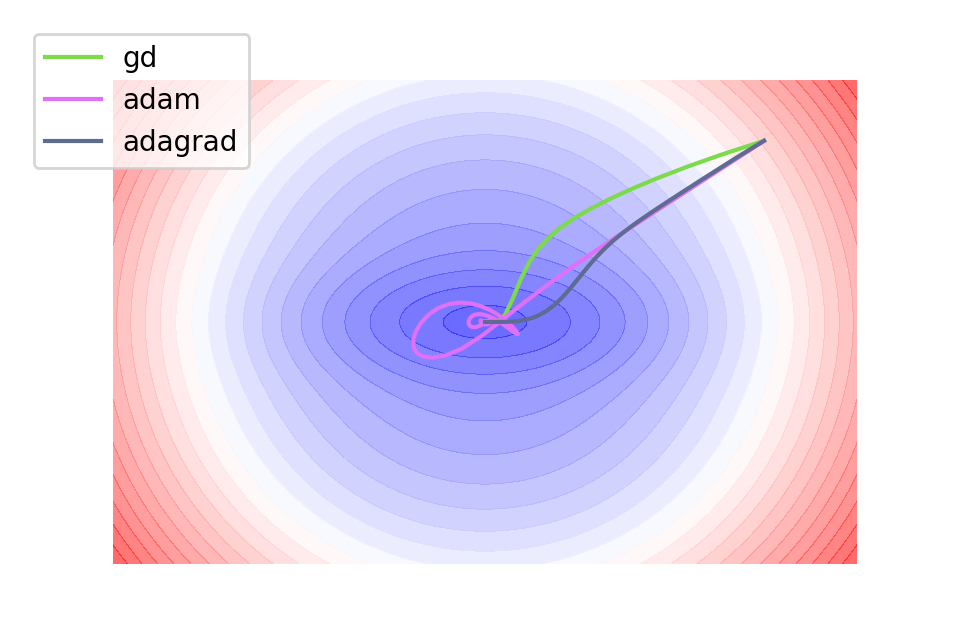

In [270]:
mm.plot2d()

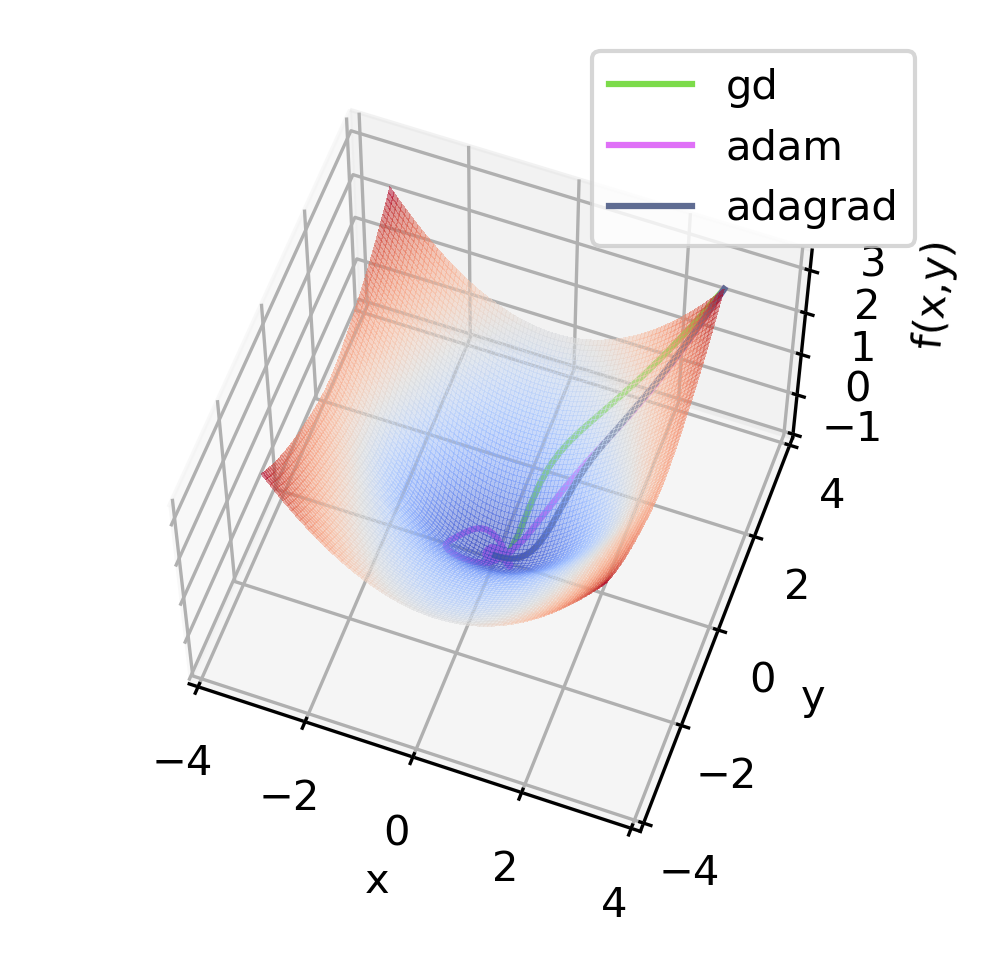

In [271]:
mm.plot3d(60, -70)

In [13]:
# visualize gd

f = lambda x: x**2

In [29]:
data = np.arange(-3, 3, 0.02)
lr = 0.1 # learning rate
gradient = lambda x: 2*x
pos = 2.5 # start position

In [30]:
points = []
points.append(pos)
while(pos**2 > 0.001):
    pos -= lr * gradient(pos)
    points.append(pos)

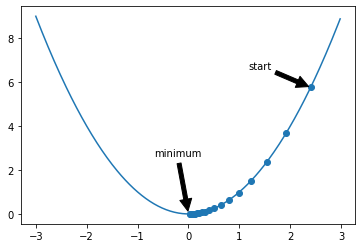

In [60]:
plt.plot(data, f(data))
plt.scatter(np.array(points), f(np.array(points)))
plt.annotate("start", xy=(points[0], f(points[0])), xycoords='data',
            xytext=(0.75, 0.75), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
plt.annotate("minimum", xy=(0, 0), xycoords='data',
            xytext=(0.4, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')
plt.savefig("gd_ex1.png")

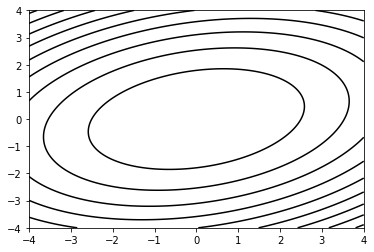

In [139]:
x = np.linspace(-4.0, 4.0, 200)
y = np.linspace(-4.0, 4.0, 200)
X, Y = np.meshgrid(x, y)
Z = ((X+Y) * (2**(1/2)))**2 + ((X-1.7*Y) * (2**(1/2)))**2
plt.contour(X, Y, Z, levels=10, colors="black")
plt.savefig("contour.png") # drawing the paths by hand